# Marketing Campaign for Banking Products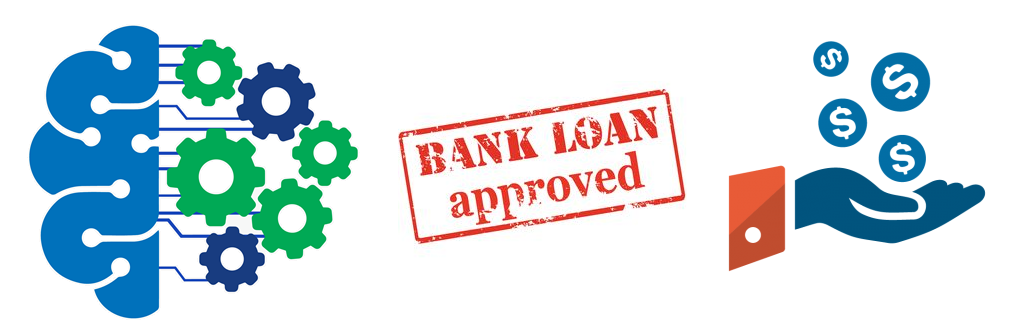

# **MODEL _TRAGET**

*Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.*



# Importing the required libraries for modeeling the given dataset
**Libraries :-**
#  *numpy,pandas,seaborn,matplotlib*

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Uploading the given dataset **(Bank_Personal_Loan_Modelling.xlsx)** to the colab to process further.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


# **DATASET_CONTENT**

*The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign*

# Reading the given dataset to **Customerdf** using *panda.read_excel* fucntion

In [ ]:
Customerdf = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx","Data")


In [ ]:
Customerdf.columns =["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [ ]:
Customerdf.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
Customerdf.shape

(5000, 14)

#    **Information on the features**
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
**The binary category have five variables as below:** 

***Personal Loan*** - Did this customer accept the personal loan offered in the last campaign? This is our target variable
***Securities Account*** - Does the customer have a securities account with the bank?
***CD Account*** - Does the customer have a certificate of deposit (CD) account with the bank?
***Online*** - Does the customer use internet banking facilities?
***Credit Card*** - Does the customer use a credit card issued by UniversalBank?

In [ ]:
Customerdf.head(3)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


# **Interval variables are as below:**

Age - Age of the customer,
Experience - Years of experience,
Income - Annual income in dollars,
CCAvg - Average credit card spending,
Mortage - Value of House Mortgage.

**Ordinal Categorical Variables are:**

Family - Family size of the customer,
Education - education level of the customer.

**The nominal variable is :** 

ID
Zip Code

In [ ]:
Customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# **SUMMARY OF DATA :**
***MEAN,COUNT,STANDARAD DEVIATION ,QUARTILE RANGE MINIMUM,MAXIMUM***

In [ ]:
# Eye balling the data
Customerdf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# No columns have null data in the file
Customerdf.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

# **EDA**-*Exploratory Data Analysis*

In [ ]:
#finding unique data
Customerdf.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
Customerdf=Customerdf.drop(['ZIPCode'],axis=1)

In [ ]:
#DATACLEANING
#DROPPING IRRELEVANT COLUMNS
#comparing similarity in age and Experince correlation
correlation= Customerdf['Age'].corr(Customerdf['Experience'])
correlation

0.9942148569683321

In [ ]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
Customerdf[Customerdf['Experience'] < 0]['Experience'].count()

52

In [ ]:
#clean the negative variable
dfExp = Customerdf.loc[Customerdf['Experience'] >0]
negExp = Customerdf.Experience < 0
column_name = 'Experience'
mylist = Customerdf.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

# The following code does the below steps:

For the record with the ID, get the value of Age column
For the record with the ID, get the value of Education column
Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
Apply the median back to the location which had negative experience

In [ ]:
for id in mylist:
    age = Customerdf.loc[np.where(Customerdf['ID']==id)]["Age"].tolist()[0]
    education = Customerdf.loc[np.where(Customerdf['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    Customerdf.loc[Customerdf.loc[np.where(Customerdf['ID']==id)].index, 'Experience'] = exp
# checking if there are records with negative experience
Customerdf[Customerdf['Experience'] < 0]['Experience'].count()

0

In [ ]:
Customerdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Before :-correction**

            count	  mean	    std	      **min**	25%	50%	   75%	      max
Experience	5000.0	20.104600	11.467954	**-3.0**	10.00	20.0	30.00	  43.0

**After :-correction**

Experience	4971.0	20.243211	11.359189	**0.0**	10.00	20.0	30.00	43.0


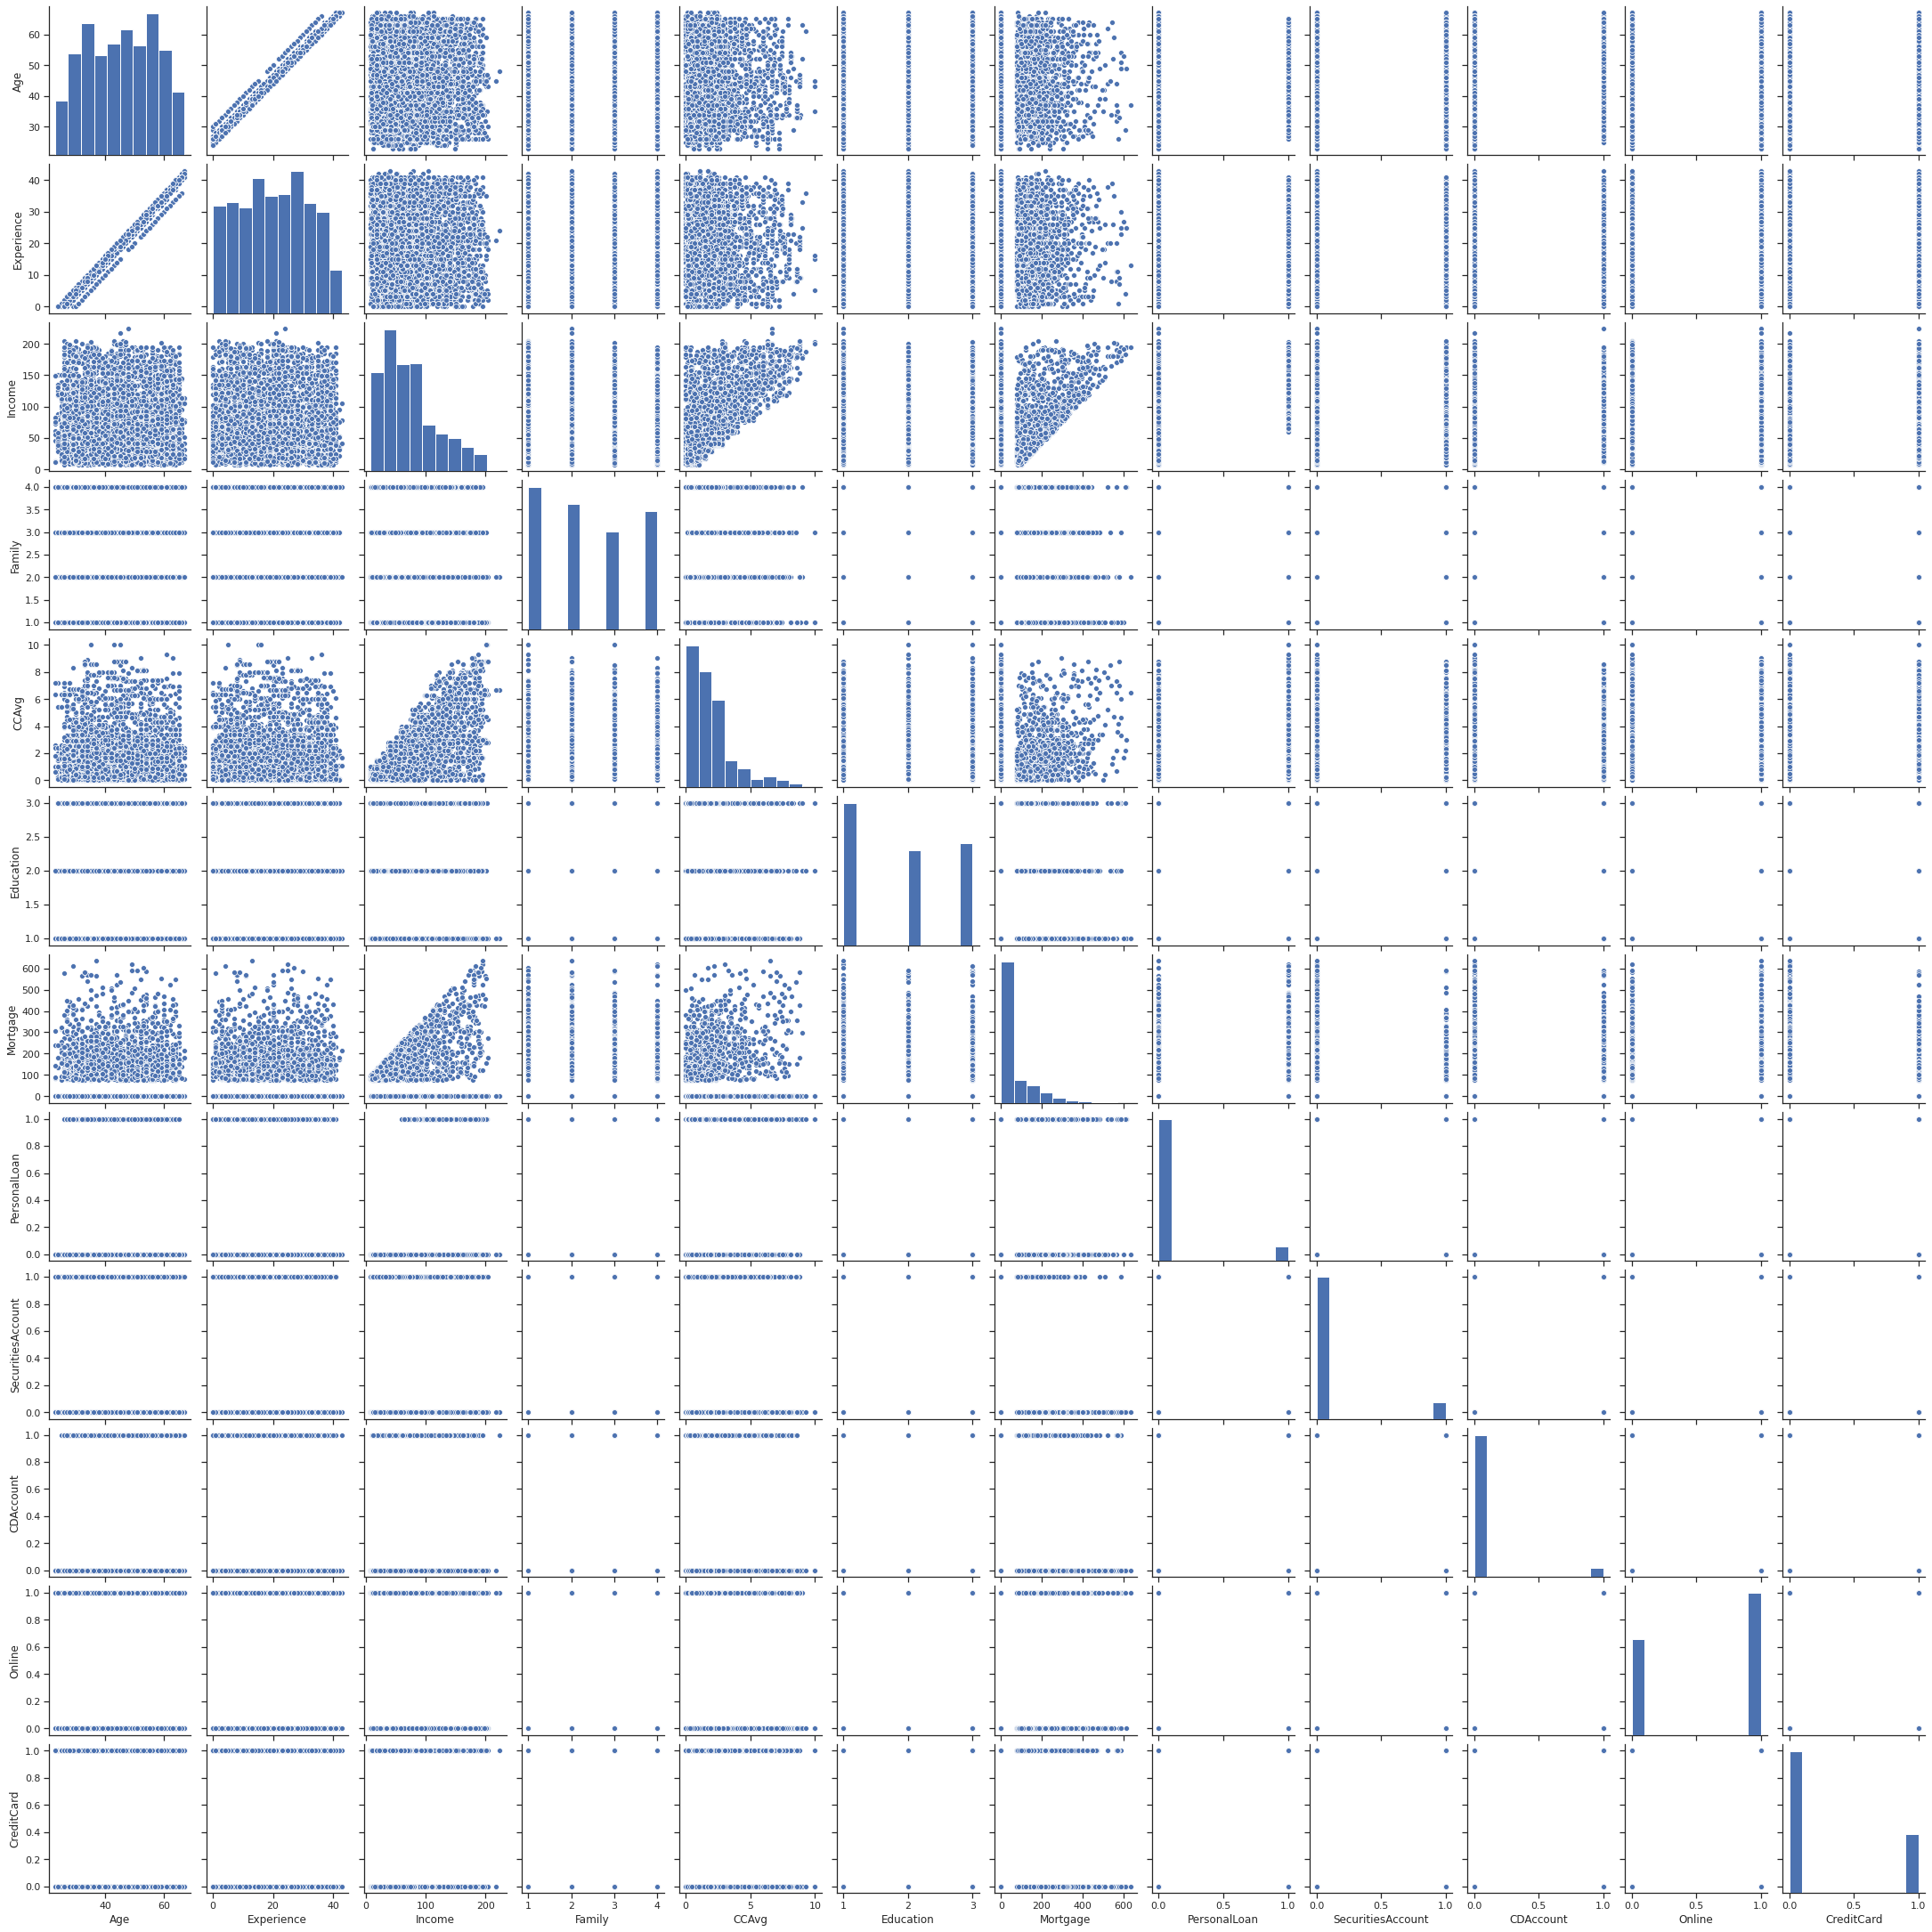

In [ ]:
sns.pairplot(Customerdf.iloc[:,1:])

**Age**- feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.

**Experience** is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

**Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

**CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

**Mortgage 70%** of the individuals have a mortgage of less than 40K. However the max value is 635K.

The variables family and education are ordinal variables. The distribution of families is evenly distributes

# Influence of income and education on personal loan

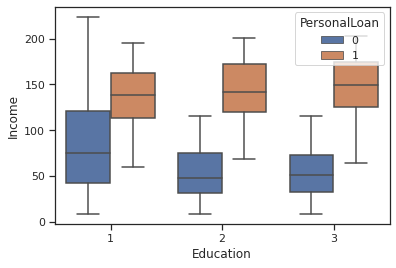

In [ ]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=Customerdf)

# Observation : 
 
It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

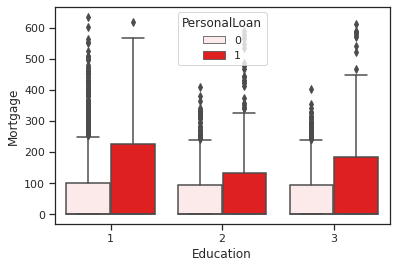

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=Customerdf,color='red')

# Inference : 

From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

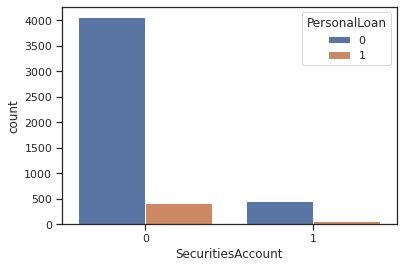

In [ ]:
sns.countplot(x="SecuritiesAccount", data=Customerdf,hue="PersonalLoan")

# Observation : 

Majority of customers who does not have loan have securities account

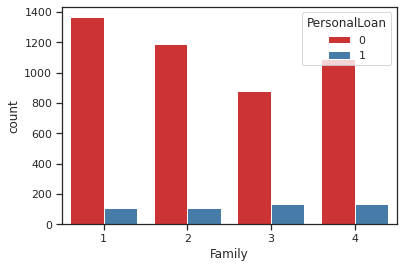

In [ ]:
sns.countplot(x='Family',data=Customerdf,hue='PersonalLoan',palette='Set1')

# Observation: 

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

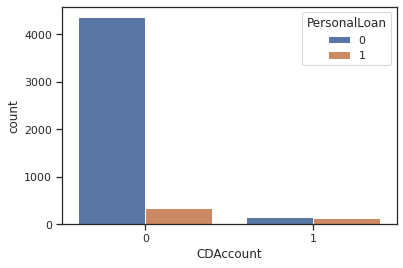

In [ ]:
sns.countplot(x='CDAccount',data=Customerdf,hue='PersonalLoan')

# Observation: 

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

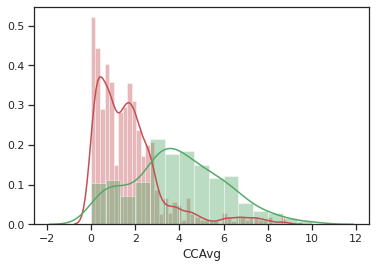

In [ ]:
sns.distplot( Customerdf[Customerdf.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( Customerdf[Customerdf.PersonalLoan == 1]['CCAvg'], color = 'g')

In [ ]:
print('Credit card spending of Non-Loan customers: ',Customerdf[Customerdf.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', Customerdf[Customerdf.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


# Observation: 

The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

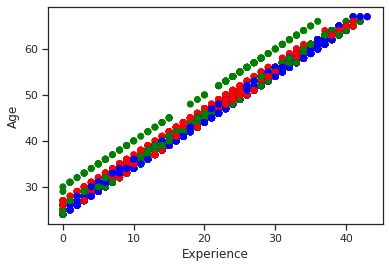

In [ ]:
fig, ax = plot.subplots()
colors = {1:'blue',2:'red',3:'green'}
ax.scatter(Customerdf['Experience'],Customerdf['Age'],c=Customerdf['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

# Observation 

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

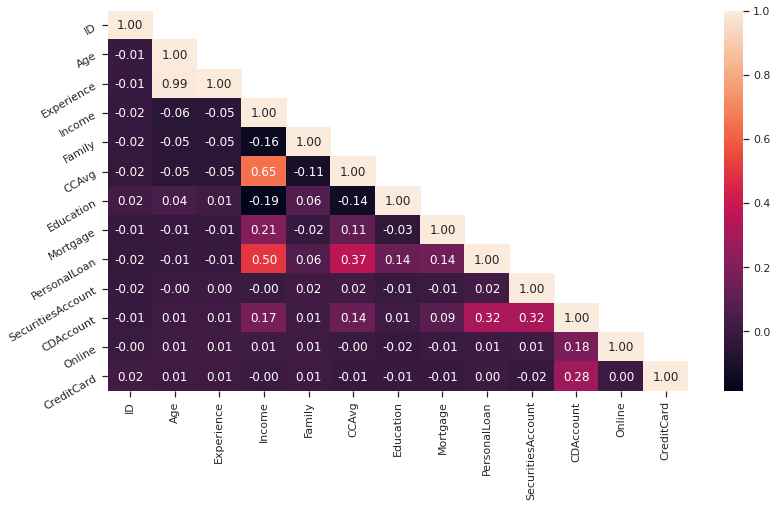

In [ ]:
#Correlation with heat map
corr = Customerdf.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plot.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Observation

Income and CCAvg is moderately correlated.

Age and Experience is highly correlated.

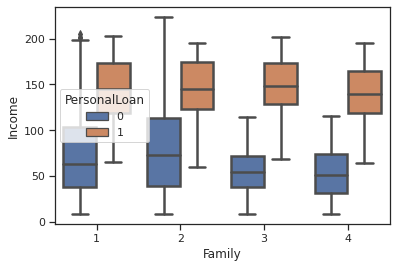

In [ ]:
sns.boxplot(x=Customerdf.Family,y=Customerdf.Income,hue=Customerdf.PersonalLoan)
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with high income

# Applying models
**Split data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Customerdf.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
Customerdf


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1.0,49,4,1.6,1,0,1,0,0,0
1,2,45,19.0,34,3,1.5,1,0,1,0,0,0
2,3,39,15.0,11,1,1.0,1,0,0,0,0,0
3,4,35,9.0,100,1,2.7,2,0,0,0,0,0
4,5,35,8.0,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,1,1.9,3,0,0,0,1,0
4996,4997,30,4.0,15,4,0.4,1,85,0,0,1,0
4997,4998,63,39.0,24,2,0.3,3,0,0,0,0,0
4998,4999,65,40.0,49,3,0.5,2,0,0,0,1,0


# **Logistic Regression **

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_set, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy: 0.95
Testing Accuracy: 0.94
Precision: 0.82
Recall: 0.56


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

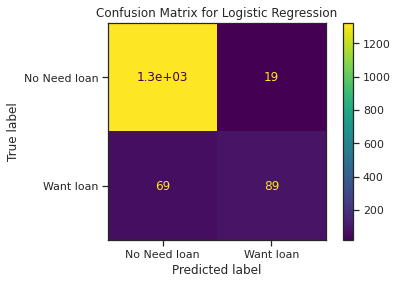

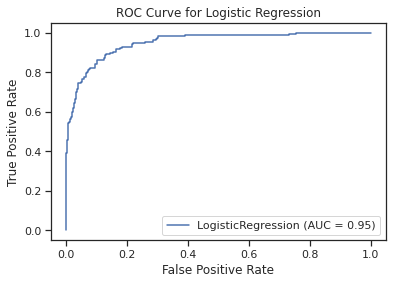

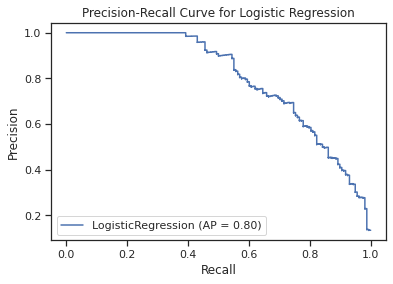

In [ ]:
class_names = ['No Need loan', 'Want loan']
train_score = log_reg.score(train_set, train_labels)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_set, test_labels)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_set)

precision_logi = precision_score(test_labels, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_labels, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_set, test_labels, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_set, test_labels)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_set, test_labels)
plt.title('Precision-Recall Curve for Logistic Regression')

# **Naive Bayes**

Training Accuracy: 0.88
Testing Accuracy: 0.88
Precision: 0.46
Recall: 0.61


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

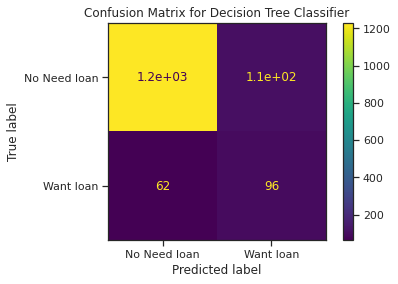

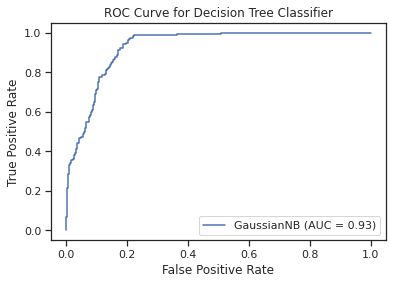

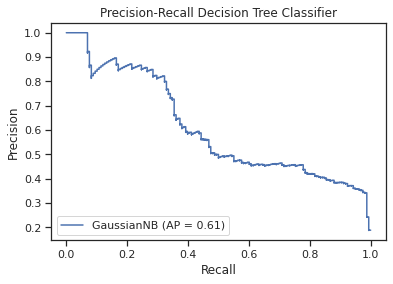

In [ ]:
nm = GaussianNB()
nm.fit(train_set, train_labels)
y_pred=nm.predict(test_set)
train_score = nm.score(train_set, train_labels)
print('Training Accuracy:', train_score.round(2))
test_score = nm.score(test_set, test_labels)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_labels, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_labels, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(nm, test_set, test_labels, display_labels=class_names)
plt.title('Confusion Matrix for Naive Bayes')

plot_roc_curve(nm, test_set, test_labels)
plt.title('ROC Curve for Naive Bayes')

plot_precision_recall_curve(nm, test_set, test_labels)
plt.title('Precision-Recall Naive Bayes')



# **Decision tree classification**

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.92
Recall: 0.91


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

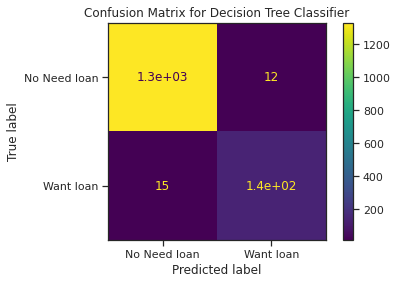

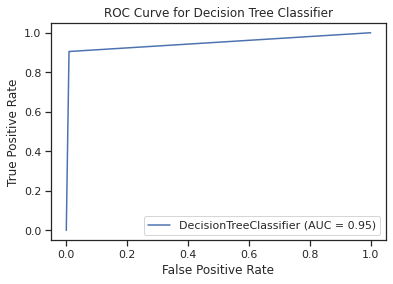

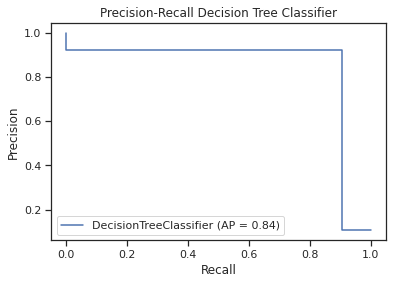

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_set, train_labels)
y_pred=dtc.predict(test_set)
train_score = dtc.score(train_set, train_labels)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_set, test_labels)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_labels, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_labels, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_set, test_labels, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_set, test_labels)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_set, test_labels)
plt.title('Precision-Recall Decision Tree Classifier')

# **Random Forest Classification**

Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.97
Recall: 0.86


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

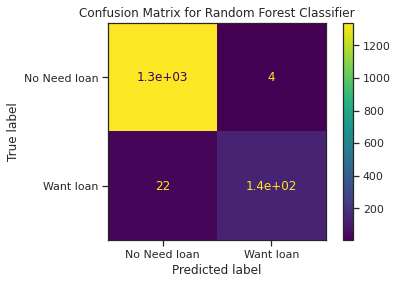

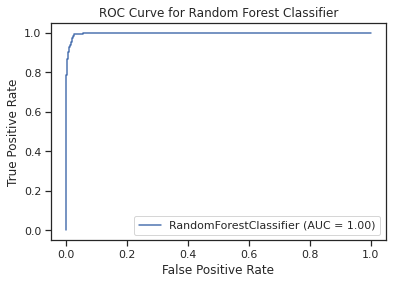

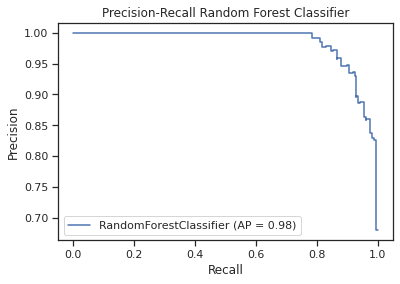

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(train_set, train_labels)
train_score = rfc.score(train_set, train_labels)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_set, test_labels)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(test_set)

precision_rf = precision_score(test_labels, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_labels, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, test_set, test_labels, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, test_set, test_labels)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_set, test_labels)
plt.title('Precision-Recall Random Forest Classifier')

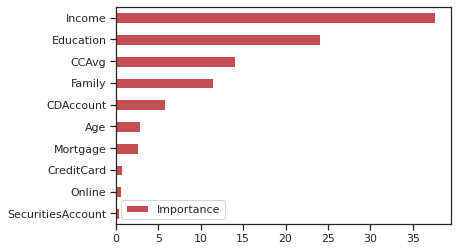

In [ ]:
Importance = pd.DataFrame({'Importance':rfc.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

# **KNN ( K - Nearest Neighbour )**

Training Accuracy: 0.92
Testing Accuracy: 0.9
Precision: 0.53
Recall: 0.25


Text(0.5, 1.0, 'Precision-Recall K - Nearest Neighbour')

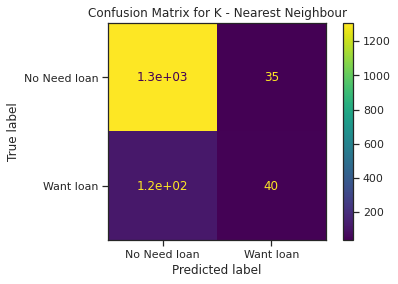

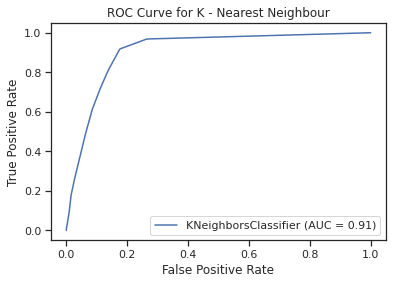

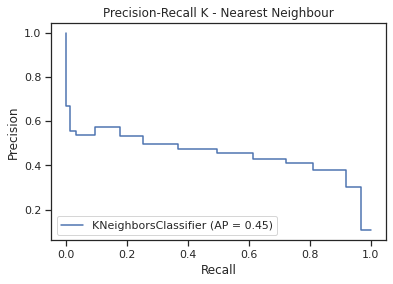

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_set,train_labels)
y_pred=k.predict(test_set)
train_score = k.score(train_set, train_labels)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_set, test_labels)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_labels, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_labels, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, test_set, test_labels, display_labels=class_names)
plt.title('Confusion Matrix for K - Nearest Neighbour')

plot_roc_curve(k, test_set, test_labels)
plt.title('ROC Curve for K - Nearest Neighbour')

plot_precision_recall_curve(k, test_set, test_labels)
plt.title('Precision-Recall K - Nearest Neighbour')

# **Model comparison**

In [ ]:
print("K - Nearest Neighbour ",k.score(test_set,test_labels))
print("Random Forest Classification",rfc.score(test_set,test_labels))
print("Decision tree classification",dtc.score(test_set,test_labels))
print("Naive Bayes",nm.score(test_set,test_labels))
print("Logistic Regression",log_reg.score(test_set,test_labels))



K - Nearest Neighbour  0.898
Random Forest Classification 0.9826666666666667
Decision tree classification 0.982
Naive Bayes 0.884
Logistic Regression 0.9413333333333334


# **Conclusion**

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like  **Random Forest Classification(0.9826) and Decision Tree algorithm (0.982)** have the highest accuracy and we can choose any of those that as our final model